

- Use UXarray to load an MPAS grid file
- Make a figure that shows a globe oriented in some specified way.
- Color the ocean and land with different colors
- add coastlines, national, and state borders
- Draw two circles around a specified location
- Fill one of the circles with a semi-transparent color
- Add labels to the circle area and another area
- Use UXarray's `to_linecollection` to draw the MPAS hexagonal grid

In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import cartopy.feature as cfeature
import uxarray as ux


In [18]:
fil = "/Users/brianpm/Downloads/x1.2562/x1.2562.grid.nc"
uxds = ux.open_dataset(fil, fil)

# uxds.uxgrid.node_lon.data = np.rad2deg(uxds.uxgrid.node_lon)
# uxds.uxgrid.face_lon.data = np.rad2deg(uxds.uxgrid.face_lon)
# uxds.uxgrid.edge_lon.data = np.rad2deg(uxds.uxgrid.edge_lon)

# uxds.uxgrid.node_lat.data = np.rad2deg(uxds.uxgrid.node_lat)
# uxds.uxgrid.face_lat.data = np.rad2deg(uxds.uxgrid.face_lat)
# uxds.uxgrid.edge_lat.data = np.rad2deg(uxds.uxgrid.edge_lat)

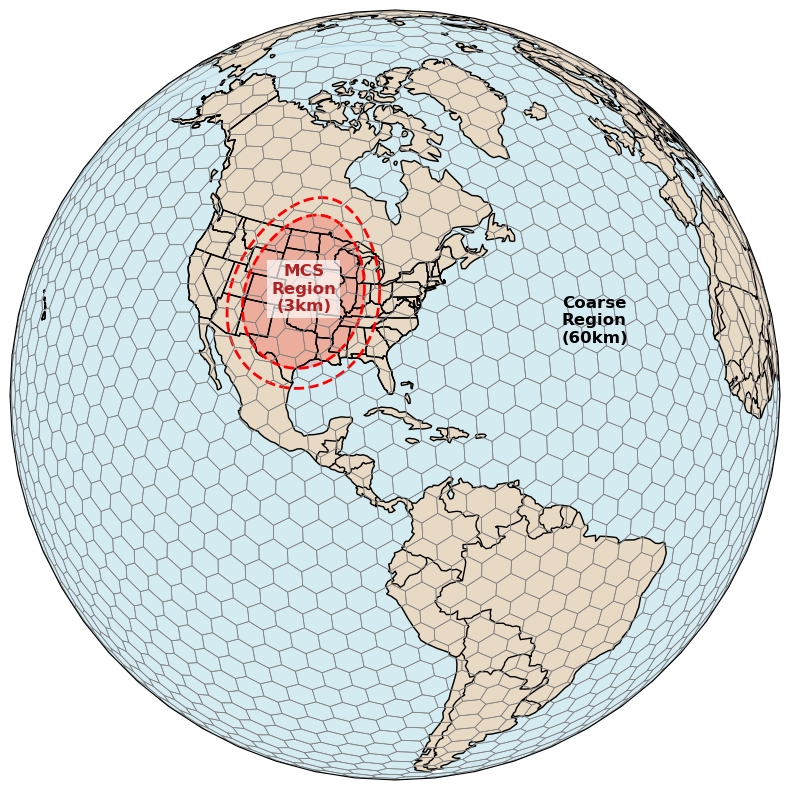

In [39]:

# Create figure and axis with orthographic projection
plt.figure(figsize=(10, 10))
proj = ccrs.Orthographic(central_longitude=-80, central_latitude=25)
ax = plt.axes(projection=proj)

# Add ocean and land colors
ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.5)
ax.add_feature(cfeature.LAND, color='tan', alpha=0.5)

# Add coastlines, country borders, and state boundaries
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)

# Set map boundaries to focus on North America
ax.set_global()
# ax.set_extent([-140, -60, 20, 60], crs=ccrs.PlateCarree())

# Draw a circle around central USA
# Center point (approximately Kansas)
center_lon, center_lat = -98, 40
radius = 12  # degrees

# Create circle points
theta = np.linspace(0, 2*np.pi, 100)
circle_lon = center_lon + radius * np.cos(theta)
circle_lat = center_lat + radius * np.sin(theta)

# 2nd Create circle points
theta2 = np.linspace(0, 2*np.pi, 100)
circle_lon2 = center_lon + (radius+3) * np.cos(theta)
circle_lat2 = center_lat + (radius+3) * np.sin(theta)


# Plot the circle
ax.plot(circle_lon, circle_lat, transform=ccrs.PlateCarree(),
        color='red', linewidth=2, linestyle='--')

# Plot the circle
ax.plot(circle_lon2, circle_lat2, transform=ccrs.PlateCarree(),
        color='red', linewidth=2, linestyle='--')

# Instead of plotting the circles with lines, fill them
ax.fill(circle_lon, circle_lat, transform=ccrs.PlateCarree(),
        color='red', alpha=0.2)  # alpha controls transparency (0-1)

# ax.fill(circle_lon2, circle_lat2, transform=ccrs.PlateCarree(),
#         color='red', alpha=0.1)  # making the outer circle more transparent

# Add text inside the circle
ax.text(center_lon, center_lat, 'MCS\nRegion\n(3km)', 
        transform=ccrs.PlateCarree(),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=12,
        color='firebrick',
        fontweight='bold',
        bbox=dict(facecolor='white', 
                 alpha=0.7,
                 edgecolor='none',
                 pad=3.0))

ax.text(-50, 30, "Coarse\nRegion\n(60km)",
        transform=ccrs.PlateCarree(),
        fontsize=12, color='black',
        fontweight='bold')

lc_direct_projection = uxds.uxgrid.to_linecollection(
    override=True, colors="gray", linewidths=0.5, projection=projection
)

# ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
ax.add_collection(lc_direct_projection)
ax.set_global()
